I initially conducted data exploration utilizing matplotlib and seaborn libraries. Following that, I applied various classification and regression algorithms to estimate wine quality.

- RandomForest Classifier
- Stochastic Gradient Descent Classifier
- Support Vector Classifier (SVC)
- Multi-Class Neural Network Classifier
- Regression Neural Network Classifier

To optimize model performance, I employed cross-validation evaluation methods, including:

- GridSearchCV
- Cross-Validation Score

In [209]:
#Importing required packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [128]:
#Loading dataset
wine = pd.read_csv('../data/winequality-red.csv')

In [129]:
#Check data
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [130]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## **Plot wine attributes vs quality**

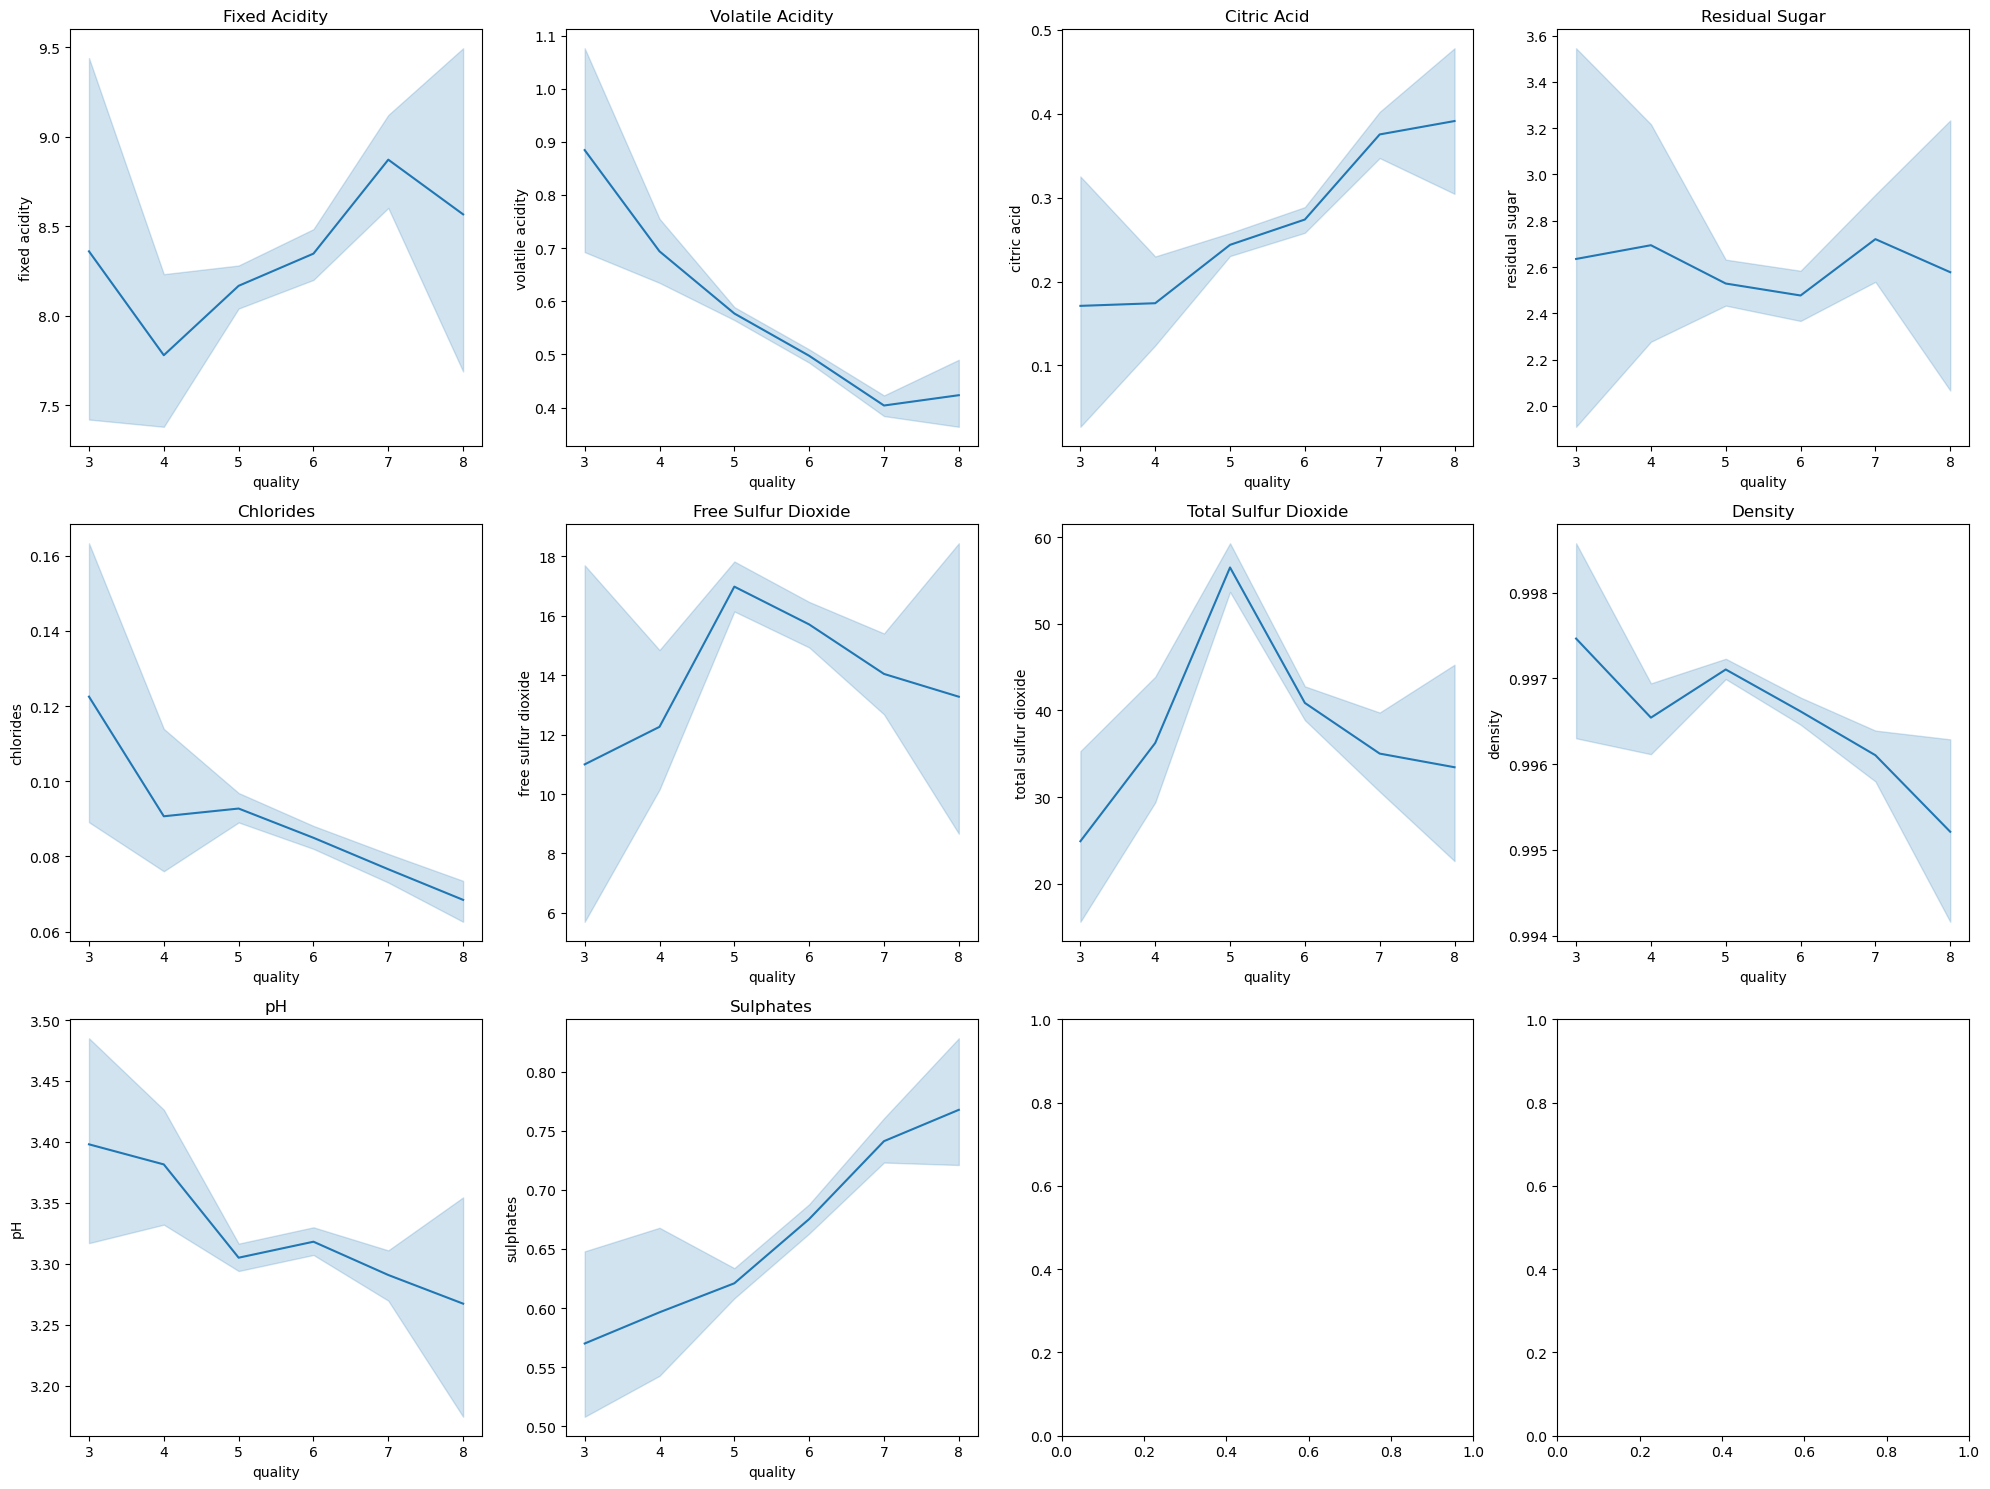

In [131]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# First row
sns.lineplot(ax=axes[0, 0], x='quality', y='fixed acidity', data=wine)
axes[0, 0].set_title('Fixed Acidity')

sns.lineplot(ax=axes[0, 1], x='quality', y='volatile acidity', data=wine)
axes[0, 1].set_title('Volatile Acidity')

sns.lineplot(ax=axes[0, 2], x='quality', y='citric acid', data=wine)
axes[0, 2].set_title('Citric Acid')

sns.lineplot(ax=axes[0, 3], x='quality', y='residual sugar', data=wine)
axes[0, 3].set_title('Residual Sugar')

# Second row
sns.lineplot(ax=axes[1, 0], x='quality', y='chlorides', data=wine)
axes[1, 0].set_title('Chlorides')

sns.lineplot(ax=axes[1, 1], x='quality', y='free sulfur dioxide', data=wine)
axes[1, 1].set_title('Free Sulfur Dioxide')

sns.lineplot(ax=axes[1, 2], x='quality', y='total sulfur dioxide', data=wine)
axes[1, 2].set_title('Total Sulfur Dioxide')

sns.lineplot(ax=axes[1, 3], x='quality', y='density', data=wine)
axes[1, 3].set_title('Density')

# Third row
sns.lineplot(ax=axes[2, 0], x='quality', y='pH', data=wine)
axes[2, 0].set_title('pH')

sns.lineplot(ax=axes[2, 1], x='quality', y='sulphates', data=wine)
axes[2, 1].set_title('Sulphates')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


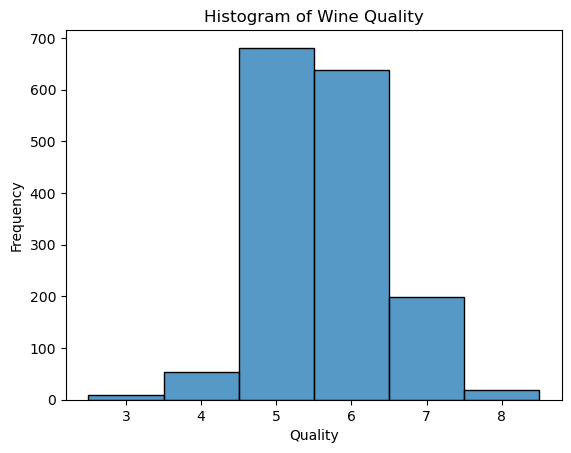

In [132]:
# Histogram for outcome variable quality
sns.histplot(data=wine, x='quality', discrete=True)

# Add title and labels
plt.title('Histogram of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## Preprocessing Data for performing Machine learning algorithms

In [133]:
# summary stats for outcome variable quality
summary = wine['quality'].describe()
print(summary)

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


In [134]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality.bin'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

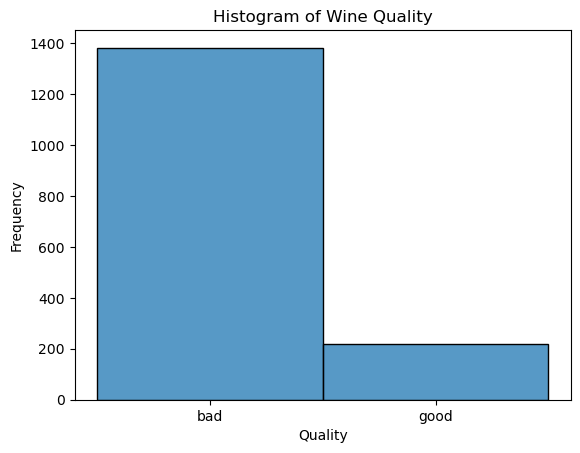

In [135]:
# new histogram
sns.histplot(data=wine, x='quality.bin', discrete=True)

# Add title and labels
plt.title('Histogram of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [136]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [137]:
#Bad becomes 0 and good becomes 1 
wine['quality.bin'] = label_quality.fit_transform(wine['quality.bin'])

In [138]:
wine['quality.bin'].value_counts()

0    1382
1     217
Name: quality.bin, dtype: int64

## Prepare data for training and testing

In [139]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop(['quality', 'quality.bin'], axis = 1)
y = wine['quality.bin']

In [140]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [159]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Perform machine learning algorithm

### Random Forest Classifier

In [143]:
rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [144]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.72      0.38      0.50        47

    accuracy                           0.89       320
   macro avg       0.81      0.68      0.72       320
weighted avg       0.88      0.89      0.87       320



#### Random forest obtains accuracy of 89%

In [145]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[266   7]
 [ 29  18]]




## Stochastic Gradient Decent Classifier

In [146]:
sgd = SGDClassifier(penalty=None, random_state=42)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [147]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       273
           1       0.44      0.17      0.25        47

    accuracy                           0.85       320
   macro avg       0.66      0.57      0.58       320
weighted avg       0.81      0.85      0.82       320



#### 85% accuracy using stochastic gradient descent classifier

In [148]:
print(confusion_matrix(y_test, pred_sgd))

[[263  10]
 [ 39   8]]


## Support Vector Classifier

In [149]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [150]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



#### Support vector classifier gets 88%

## Increase our accuracy of models
## Grid Search CV

In [151]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [152]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [153]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [154]:
#Run the SVC again with the best parameters from our grid search.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf', random_state=42)
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



### SVC improves from 88% to 90% using Grid Search CV

## Cross Validation Score for random forest and SGD

In [155]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9116818405511811

### Our previous random forest estimate was 89%, but when we applied cross-validation (k-folds=10), we are not improving the model's performance; instead, we are obtaining a better estimate of how well the model is likely to perform on unseen data, which in this case is 91%

## Neural Network/ Deep learning Algorithm as Multi-Class Classification Problem

In [168]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop(['quality', 'quality.bin'], axis = 1)
y = wine['quality']

In [169]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [170]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [183]:
nn_clf = MLPClassifier(hidden_layer_sizes=(60, 20), random_state=42, max_iter=1000, learning_rate='adaptive', learning_rate_init=0.0001, alpha=0.005, activation='relu')

# Train the classifier using the scaled training data
nn_clf.fit(X_train, y_train)

# Make predictions using the scaled test data
y_pred = nn_clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural network accuracy: {accuracy:.2f}")

Neural network accuracy: 0.57


c:\Users\gmustiga\Anaconda3\envs\ds\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Do a grid search

In [189]:
param_grid = {
    'hidden_layer_sizes': [(200, 140, 20), (100, 40, 20), (100, 50, 25), (80, 40, 20)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0005, 0.001, 0.01],
}
nn_clf = MLPClassifier(random_state=42, max_iter=600, learning_rate='adaptive', learning_rate_init=0.0001)
grid_search = GridSearchCV(nn_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\gmustiga\Anaconda3\envs\ds\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=MLPClassifier(learning_rate='adaptive',
                                     learning_rate_init=0.0001, max_iter=600,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0005, 0.001, 0.01],
                         'hidden_layer_sizes': [(200, 140, 20), (100, 40, 20),
                                                (100, 50, 25), (80, 40, 20)]},
             scoring='accuracy', verbose=1)

In [190]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found:", best_params)
print("Best accuracy score found:", best_score)

Best parameters found: {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': (200, 140, 20)}
Best accuracy score found: 0.6434957107843138


In [191]:
best_nn_clf = grid_search.best_estimator_

y_pred = best_nn_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Neural network accuracy with best parameters: {accuracy:.2f}")

Neural network accuracy with best parameters: 0.66


## Neural Network/ Deep learning Algorithm as Regression problem

In [212]:
nn_reg = MLPRegressor(hidden_layer_sizes=(200,100, 20), random_state=42, max_iter=500, learning_rate='adaptive', learning_rate_init=0.0005, alpha=0.001, activation='relu')

# Train the regressor using the scaled training data
nn_reg.fit(X_train, y_train)

# Make predictions using the scaled test data
y_pred = nn_reg.predict(X_test)

# Round the predictions to the nearest integer values
y_pred_rounded = np.round(y_pred)

# Calculate the mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred_rounded )
r2 = r2_score(y_test, y_pred_rounded )

print(f"Neural network mean squared error: {mse:.2f}")
print(f"Neural network R2 score: {r2:.2f}")

Neural network mean squared error: 0.47
Neural network R2 score: 0.27


Conclusion: Best Results achieved with the 91% with Random Forest. The deep learning algorithm methods did not converge